In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/customer-churn/churn_prediction.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,confusion_matrix,roc_auc_score

In [3]:
data=pd.read_csv('data/churn_prediction.csv')
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
3,5,478,90,NaN,NaN,self_employed,1020.0,2,582,147.0,...,2291.91,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1


In [4]:
data.shape

(28382, 21)

In [5]:
data.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

In [6]:
data=data.drop(data[data['gender'].isna()].index)
data.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,1458.71,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0
1,2,310,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,8704.66,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,NaN,...,5815.29,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,1401.72,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,16059.34,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0


In [7]:
data['dependents']=data['dependents'].fillna(data['dependents'].mode()[0])
data['dependents'].isna().sum()

0

In [8]:
data['occupation']=data['occupation'].fillna(data['occupation'].mode()[0])
data['occupation'].isna().sum()

0

In [9]:
data['city']=data['city'].fillna(data['city'].mode()[0])
data['city'].isna().sum()

0

In [10]:
data['days_since_last_transaction']=data['days_since_last_transaction'].fillna(999)
data['days_since_last_transaction'].isna().sum()

0

In [11]:
data.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

In [12]:
num_cols=['current_balance','previous_month_end_balance','average_monthly_balance_prevQ',
         'average_monthly_balance_prevQ2','current_month_credit','previous_month_credit','current_month_debit','previous_month_debit',
          'current_month_balance','previous_month_balance'
         ]

In [13]:
data2=data
data2.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
dtype: int64

OneHot Encoding on occupation feature

In [14]:
data2=pd.concat([data2,pd.get_dummies(data['occupation'],prefix='occupation')],axis=1)
data2.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,0.20,0.20,1458.71,1458.71,0,0,0,0,1,0
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,...,5486.27,100.56,6496.78,8787.61,0,0,0,0,1,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,999.0,...,6046.73,259.23,5006.28,5070.14,0,0,0,1,0,0
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,588.62,1538.06,1157.15,1677.16,1,0,0,0,1,0
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,857.50,286.07,15719.44,15349.75,0,0,0,0,1,0


# log transformation of numerical features

In [15]:
for i in num_cols:
    data2[i]=np.log(data[i]+17000)
data2.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,9.740980,9.740980,9.823292,9.823292,0,0,0,0,1,0
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,...,10.020660,9.746866,10.064619,10.157649,0,0,0,0,1,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,999.0,...,10.045279,9.756102,9.999083,10.001981,0,0,0,1,0,0
4,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,9.775007,9.827581,9.806820,9.835057,1,0,0,0,1,0
5,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,9.790179,9.757656,10.395725,10.384362,0,0,0,0,1,0


# standard scaling of features

In [16]:
std=StandardScaler()
scaled=std.fit_transform(data2[num_cols])
scaled=pd.DataFrame(scaled,columns=num_cols)
scaled.head()

,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,-0.624101,-0.644243,-0.712816,-0.641770,-0.315376,-0.325110,-0.370182,-0.379523,-0.666768,-0.679214
1,0.021959,0.471785,0.340293,0.989750,-0.315296,-0.325032,0.659958,-0.357461,0.165925,0.482066
2,-0.206401,0.069906,-0.101465,-0.391879,-0.315285,-0.325021,0.750637,-0.322843,-0.060204,-0.058597
3,-0.721759,-0.654665,-0.677326,-0.562688,-0.315347,-0.173633,-0.244851,-0.054926,-0.723604,-0.638352
4,1.237843,1.319861,1.272946,1.149957,-0.315340,-0.325075,-0.188970,-0.317019,1.308398,1.269475


In [18]:
data2.reset_index(drop=True,inplace=True)

In [79]:
data2=data2.drop(columns=num_cols,axis=1)
data2.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,churn,occupation_company,occupation_retired,occupation_salaried,occupation_self_employed,occupation_student
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,0,0,0,0,1,0
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,0,0,0,0,1,0
2,4,2356,31,Male,0.0,salaried,146.0,2,41,999.0,0,0,0,1,0,0
3,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,1,0,0,0,1,0
4,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,0,0,0,0,1,0


In [80]:
data3=data2
data3=pd.concat([data3,scaled],axis=1)
data3.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance
0,1,3135,66,Male,0.0,self_employed,187.0,2,755,224.0,...,-0.624101,-0.644243,-0.712816,-0.641770,-0.315376,-0.325110,-0.370182,-0.379523,-0.666768,-0.679214
1,2,310,35,Male,0.0,self_employed,1020.0,2,3214,60.0,...,0.021959,0.471785,0.340293,0.989750,-0.315296,-0.325032,0.659958,-0.357461,0.165925,0.482066
2,4,2356,31,Male,0.0,salaried,146.0,2,41,999.0,...,-0.206401,0.069906,-0.101465,-0.391879,-0.315285,-0.325021,0.750637,-0.322843,-0.060204,-0.058597
3,6,2531,42,Male,2.0,self_employed,1494.0,3,388,58.0,...,-0.721759,-0.654665,-0.677326,-0.562688,-0.315347,-0.173633,-0.244851,-0.054926,-0.723604,-0.638352
4,7,263,42,Female,0.0,self_employed,1096.0,2,1666,60.0,...,1.237843,1.319861,1.272946,1.149957,-0.315340,-0.325075,-0.188970,-0.317019,1.308398,1.269475


In [81]:
import seaborn as sns

In [82]:
print(data3['churn'].value_counts())

0    22703
1     5154
Name: churn, dtype: int64


<Axes: xlabel='churn', ylabel='count'>

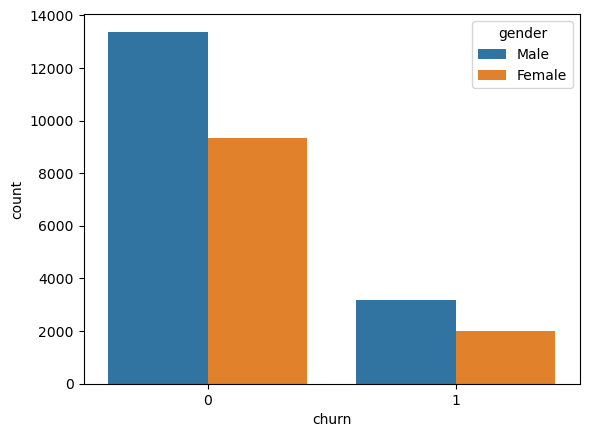

In [83]:
y_all=data3['churn']
sns.countplot(data=data2,x='churn',hue='gender')

In [84]:

baseline_cols=['occupation_company','occupation_retired','occupation_salaried','occupation_self_employed','occupation_student',
              'vintage','age','days_since_last_transaction','customer_nw_category','dependents','city'
              ]
baseline_cols.extend(num_cols)
baseline_cols

['occupation_company',
 'occupation_retired',
 'occupation_salaried',
 'occupation_self_employed',
 'occupation_student',
 'vintage',
 'age',
 'days_since_last_transaction',
 'customer_nw_category',
 'dependents',
 'city',
 'current_balance',
 'previous_month_end_balance',
 'average_monthly_balance_prevQ',
 'average_monthly_balance_prevQ2',
 'current_month_credit',
 'previous_month_credit',
 'current_month_debit',
 'previous_month_debit',
 'current_month_balance',
 'previous_month_balance']

In [85]:
df=data3[baseline_cols]
df.columns

Index(['occupation_company', 'occupation_retired', 'occupation_salaried',
       'occupation_self_employed', 'occupation_student', 'vintage', 'age',
       'days_since_last_transaction', 'customer_nw_category', 'dependents',
       'city', 'current_balance', 'previous_month_end_balance',
       'average_monthly_balance_prevQ', 'average_monthly_balance_prevQ2',
       'current_month_credit', 'previous_month_credit', 'current_month_debit',
       'previous_month_debit', 'current_month_balance',
       'previous_month_balance'],
      dtype='object')

In [86]:
y_all.isna().sum()

0

In [87]:
xtrain,xtest,ytrain,ytest=train_test_split(df,y_all,test_size=1/3,random_state=11,stratify=y_all)


In [88]:
model=LogisticRegression()
model.fit(xtrain,ytrain)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [90]:
prediction=model.predict(xtest)

In [91]:
matrix=confusion_matrix(ytest,prediction)
matrix

array([[7412,  156],
       [1401,  317]])

<Axes: >

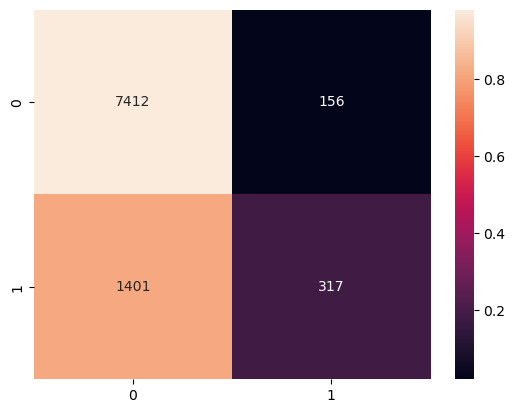

In [92]:
sns.heatmap(matrix.astype('float')/matrix.sum(axis=1)[:,np.newaxis],annot=matrix,fmt='g')

In [93]:
probability=model.predict_proba(xtest)[:,1]

In [94]:
from sklearn.metrics import accuracy_score,roc_auc_score
accuracy=accuracy_score(ytest,prediction)
auc=roc_auc_score(ytest,probability)
print(auc)

0.7595054355450435


Text(0, 0.5, 'tpr')

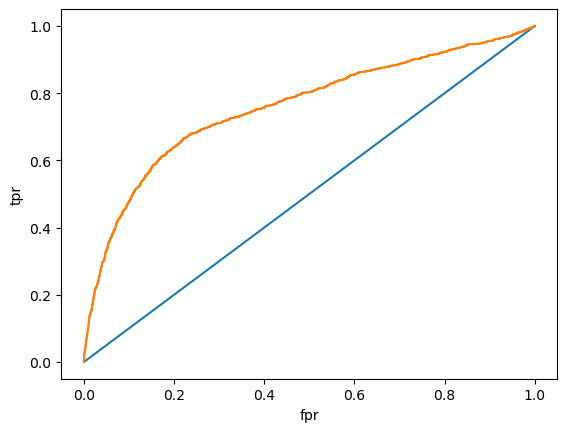

In [95]:
fpr,tpr,threshold = roc_curve(ytest,probability)
x = np.linspace(0,1,1000)
plt.plot(x,x)
plt.plot(fpr,tpr)
plt.xlabel('fpr')
plt.ylabel('tpr')

# Feature Selection

In [96]:
from sklearn.feature_selection import RFE
rfe=RFE(estimator=LogisticRegression(),step=1,n_features_to_select=1)
rfe.fit(df[baseline_cols],y_all)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RFE(estimator=LogisticRegression(), n_features_to_select=1)

In [98]:
ranks = pd.DataFrame({'feature':baseline_cols,'rank':rfe.ranking_})
ranks

,feature,rank
0,occupation_company,3
1,occupation_retired,15
2,occupation_salaried,9
3,occupation_self_employed,8
4,occupation_student,10
5,vintage,20
6,age,16
7,days_since_last_transaction,18
8,customer_nw_category,19
9,dependents,14


In [100]:
ranks=ranks.sort_values(by=['rank'])
ranks

,feature,rank
11,current_balance,1
13,average_monthly_balance_prevQ,2
0,occupation_company,3
14,average_monthly_balance_prevQ2,4
19,current_month_balance,5
20,previous_month_balance,6
17,current_month_debit,7
3,occupation_self_employed,8
2,occupation_salaried,9
4,occupation_student,10


# Selecting first 10 features

In [103]:
_10_features=ranks['feature'].values[:10]
list(_10_features)

['current_balance',
 'average_monthly_balance_prevQ',
 'occupation_company',
 'average_monthly_balance_prevQ2',
 'current_month_balance',
 'previous_month_balance',
 'current_month_debit',
 'occupation_self_employed',
 'occupation_salaried',
 'occupation_student']

In [104]:
x_train,x_test,y_train,y_test=train_test_split(df[list(_10_features)],y_all,random_state=11,stratify=y_all,test_size=1/3)

In [106]:
model2=LogisticRegression()
model2.fit(x_train,y_train)
prediction2=model2.predict(x_test)
accuracy_score(y_test,prediction2)

0.8433125134611242

In [108]:
roc_auc_score(y_test,model2.predict_proba(x_test)[:,1])

0.8048340755881636

# KFold

In [124]:
def kfold(model,features,target,data):
    kf=StratifiedKFold(n_splits=5,random_state=46,shuffle=True)
    for train,test in kf.split(data[features],target):
        xtrain=data.loc[train,features]
        ytrain=target[train]
        xtest=data.loc[test,features]
        ytest=target[test]
        mod=model
        mod.fit(xtrain,ytrain)
        print('KFold -1:')
        print('accuracy: '+ str(accuracy_score(ytest,mod.predict(xtest))))
        

In [125]:
kfold(model=LogisticRegression(),features=_10_features,target=y_all,data=df)

KFold -1:
accuracy: 0.8431442928930366
KFold -1:
accuracy: 0.8391959798994975
KFold -1:
accuracy: 0.8380901094956023
KFold -1:
accuracy: 0.8402441213426673
KFold -1:
accuracy: 0.8397056183809011
